In [13]:
%%capture
!pip install 

In [49]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import TfidfVectorizer, ENGLISH_STOP_WORDS
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay


In [3]:
df = pd.read_csv('/Users/Pierre-Alexandre/Downloads/movie_reviews.csv')

In [4]:
df.sample(3)

,text,label
3538,John Waters owes me 2 hours of my life back. I...,0
2080,Just picked up this film for a buck at Nationa...,0
50,Accepted...let's see. The only reason why i ha...,1


## Inspect and Explore

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    4000 non-null   object
 1   label   4000 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 62.6+ KB


In [6]:
df['label'].value_counts(normalize = True)

0    0.5085
1    0.4915
Name: label, dtype: float64

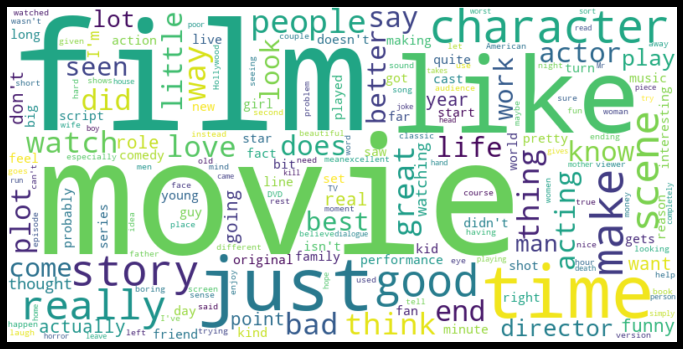

In [10]:
reviews = " ".join(df['text']) 

word_cloud = WordCloud(background_color= 'white',
                       stopwords=ENGLISH_STOP_WORDS,
                       width=800,
                       height=400)


word_cloud.generate(reviews)


plt.rcParams['figure.figsize'] = (12,8)
plt.imshow(word_cloud,interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
# Specify the word pattern
pattern = r"[a-zA-Z]+"

# Build the vectorizer and fit to the text data
vect = TfidfVectorizer(
    token_pattern=pattern, # Define the pattern to extract words
    stop_words=ENGLISH_STOP_WORDS, # Default list of English stop words
    ngram_range=(1, 2),  # Consider uni- and bi-grams
    max_features=500,  # Maximum number of features
)

vect.fit(df["text"])

# Create sparse matrix from the vectorizer
tokenized_features = vect.transform(df["text"])

# Create a DataFrame of the new features
features = pd.DataFrame(data=tokenized_features.toarray(), 
                        columns=vect.get_feature_names()
                       )
features

,able,absolutely,act,acting,action,actor,actors,actress,actually,add,...,wouldn t,writer,writing,written,wrong,year,year old,years,yes,young
0,0.000000,0.073909,0.077820,0.140430,0.062353,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.086017,...,0.000000,0.0,0.0,0.158546,0.0,0.0,0.0,0.059755,0.080679,0.0
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.109195,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.151444,0.0,0.000000,0.000000,...,0.220499,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
4,0.138907,0.000000,0.140286,0.000000,0.000000,0.000000,0.097776,0.0,0.201605,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.110813,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.113823,0.000000,0.0
3996,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3997,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0
3998,0.000000,0.000000,0.000000,0.169746,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,...,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0


In [52]:
# Generate a number of different length metrics based on the text
df["char_count"] = df["text"].str.count(r"\S")
df["word_count"] = df["text"].str.count(pattern)
df["avg_word_length"] = df["char_count"] / df["word_count"]

# Preview our new columns
df.sample(3)

,text,label,char_count,word_count,avg_word_lenght,avg_word_length
357,I had no idea what this film was about or even...,1,677,163,4.153374,4.153374
1491,I used to be an avid viewer until I personally...,0,606,144,4.208333,4.208333
1004,"Great music, but ain't these people PATHETIC?!...",0,903,195,4.630769,4.630769


In [50]:
# Define X and y
X = pd.concat([features, df.loc[:, "char_count":]], axis=1)
y = df["label"]

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.25,  
    random_state=42
)

# Train a random forest classifier
rf = RandomForestClassifier(random_state=42).fit(X_train, y_train)

# Predict the labels
y_pred = rf.predict(X_test)

# Print classification metrics
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.77      0.79       523
           1       0.76      0.80      0.78       477

    accuracy                           0.79      1000
   macro avg       0.79      0.79      0.78      1000
weighted avg       0.79      0.79      0.79      1000



In [60]:
pd.DataFrame(
    {'features':X.columns, 'importance':rf.feature_importances_}
).sort_values(by='importance', ascending = False)

,features,importance
27,bad,0.045045
487,worst,0.031163
174,great,0.021562
415,t,0.016111
25,awful,0.015166
...,...,...
420,talent,0.000416
482,words,0.000411
160,game,0.000385
17,aren,0.000374
